In [24]:
import pandas as pd
import numpy as np
import googletrans
from googletrans import Translator
import matplotlib.pyplot as plt
plt.rcdefaults() 

In [5]:
data = pd.read_csv("amazon.csv", thousands = '.', encoding='ISO-8859-1')

In [6]:
data.shape

(6454, 5)

In [7]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01


In [8]:
data.describe(include= "all")

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,2014-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,522.696312,NaN
std,5.746654,NaN,NaN,1554.846486,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,9.000000,NaN
50%,2007.000000,NaN,NaN,54.000000,NaN
75%,2012.000000,NaN,NaN,269.000000,NaN


In [9]:
data.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [12]:
data = data.replace(0, np.nan)
data2 = data.dropna(subset=['number'])

In [13]:
data2.describe(include= "all")

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5837
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,2016-01-01
freq,NaN,661,534,NaN,317
mean,2007.834847,NaN,NaN,577.947918,NaN
std,5.649076,NaN,NaN,1625.176973,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2003.000000,NaN,NaN,16.000000,NaN
50%,2008.000000,NaN,NaN,72.000000,NaN
75%,2013.000000,NaN,NaN,334.000000,NaN


In [15]:
forest_fire_per_month = data2.groupby('month')['number'].sum()
forest_fire_per_month

month
Abril          28364.0
Agosto        740841.0
Dezembro      152596.0
Fevereiro      30952.0
Janeiro        52587.0
Julho         217620.0
Junho         111405.0
Maio           46083.0
Março          35118.0
Novembro      312326.0
Outubro       629665.0
Setembro     1015925.0
Name: number, dtype: float64

In [16]:
forest_fire_per_month = forest_fire_per_month.to_frame()

In [17]:
forest_fire_per_month.head()

,number
month,
Abril,28364.0
Agosto,740841.0
Dezembro,152596.0
Fevereiro,30952.0
Janeiro,52587.0


In [18]:
forest_fire_per_month.reset_index(level=0, inplace=True)
forest_fire_per_month.head()

,month,number
0,Abril,28364.0
1,Agosto,740841.0
2,Dezembro,152596.0
3,Fevereiro,30952.0
4,Janeiro,52587.0


In [27]:
months_unique = list(data.month.unique())

In [28]:
months_unique

['Janeiro',
 'Fevereiro',
 'Março',
 'Abril',
 'Maio',
 'Junho',
 'Julho',
 'Agosto',
 'Setembro',
 'Outubro',
 'Novembro',
 'Dezembro']

In [29]:
translator = Translator()
for month in months_unique: 
    detected = translator.detect(month)     
    translated = translator.translate(month)     
    print(detected)     
    print(translated)     
    print("...")

Detected(lang=en, confidence=0.6906946)
Translated(src=en, dest=en, text=Janeiro, pronunciation=Janeiro, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=February, pronunciation=February, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=March, pronunciation=March, extra_data="{'translat...")
...
Detected(lang=es, confidence=0.47058824)
Translated(src=es, dest=en, text=April, pronunciation=April, extra_data="{'translat...")
...
Detected(lang=pt, confidence=0.75)
Translated(src=pt, dest=en, text=May, pronunciation=May, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=June, pronunciation=June, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=July, pronunciation=July, extra_data="{'translat...")
...
Detected(lang=es, confidence=0.37796605)
Translated(src=es, dest=en, text=August, pronunciation

In [30]:
translator2 = Translator() 
for i, m in enumerate(forest_fire_per_month['month']):
    translated = translator2.translate(m)  
    month1 = translated.text    
    forest_fire_per_month.at[i, 'month'] = month1

In [31]:
print(forest_fire_per_month)

        month     number
0       April    28364.0
1      August   740841.0
2    December   152596.0
3    February    30952.0
4     Janeiro    52587.0
5        July   217620.0
6        June   111405.0
7         May    46083.0
8       March    35118.0
9    November   312326.0
10    October   629665.0
11  September  1015925.0


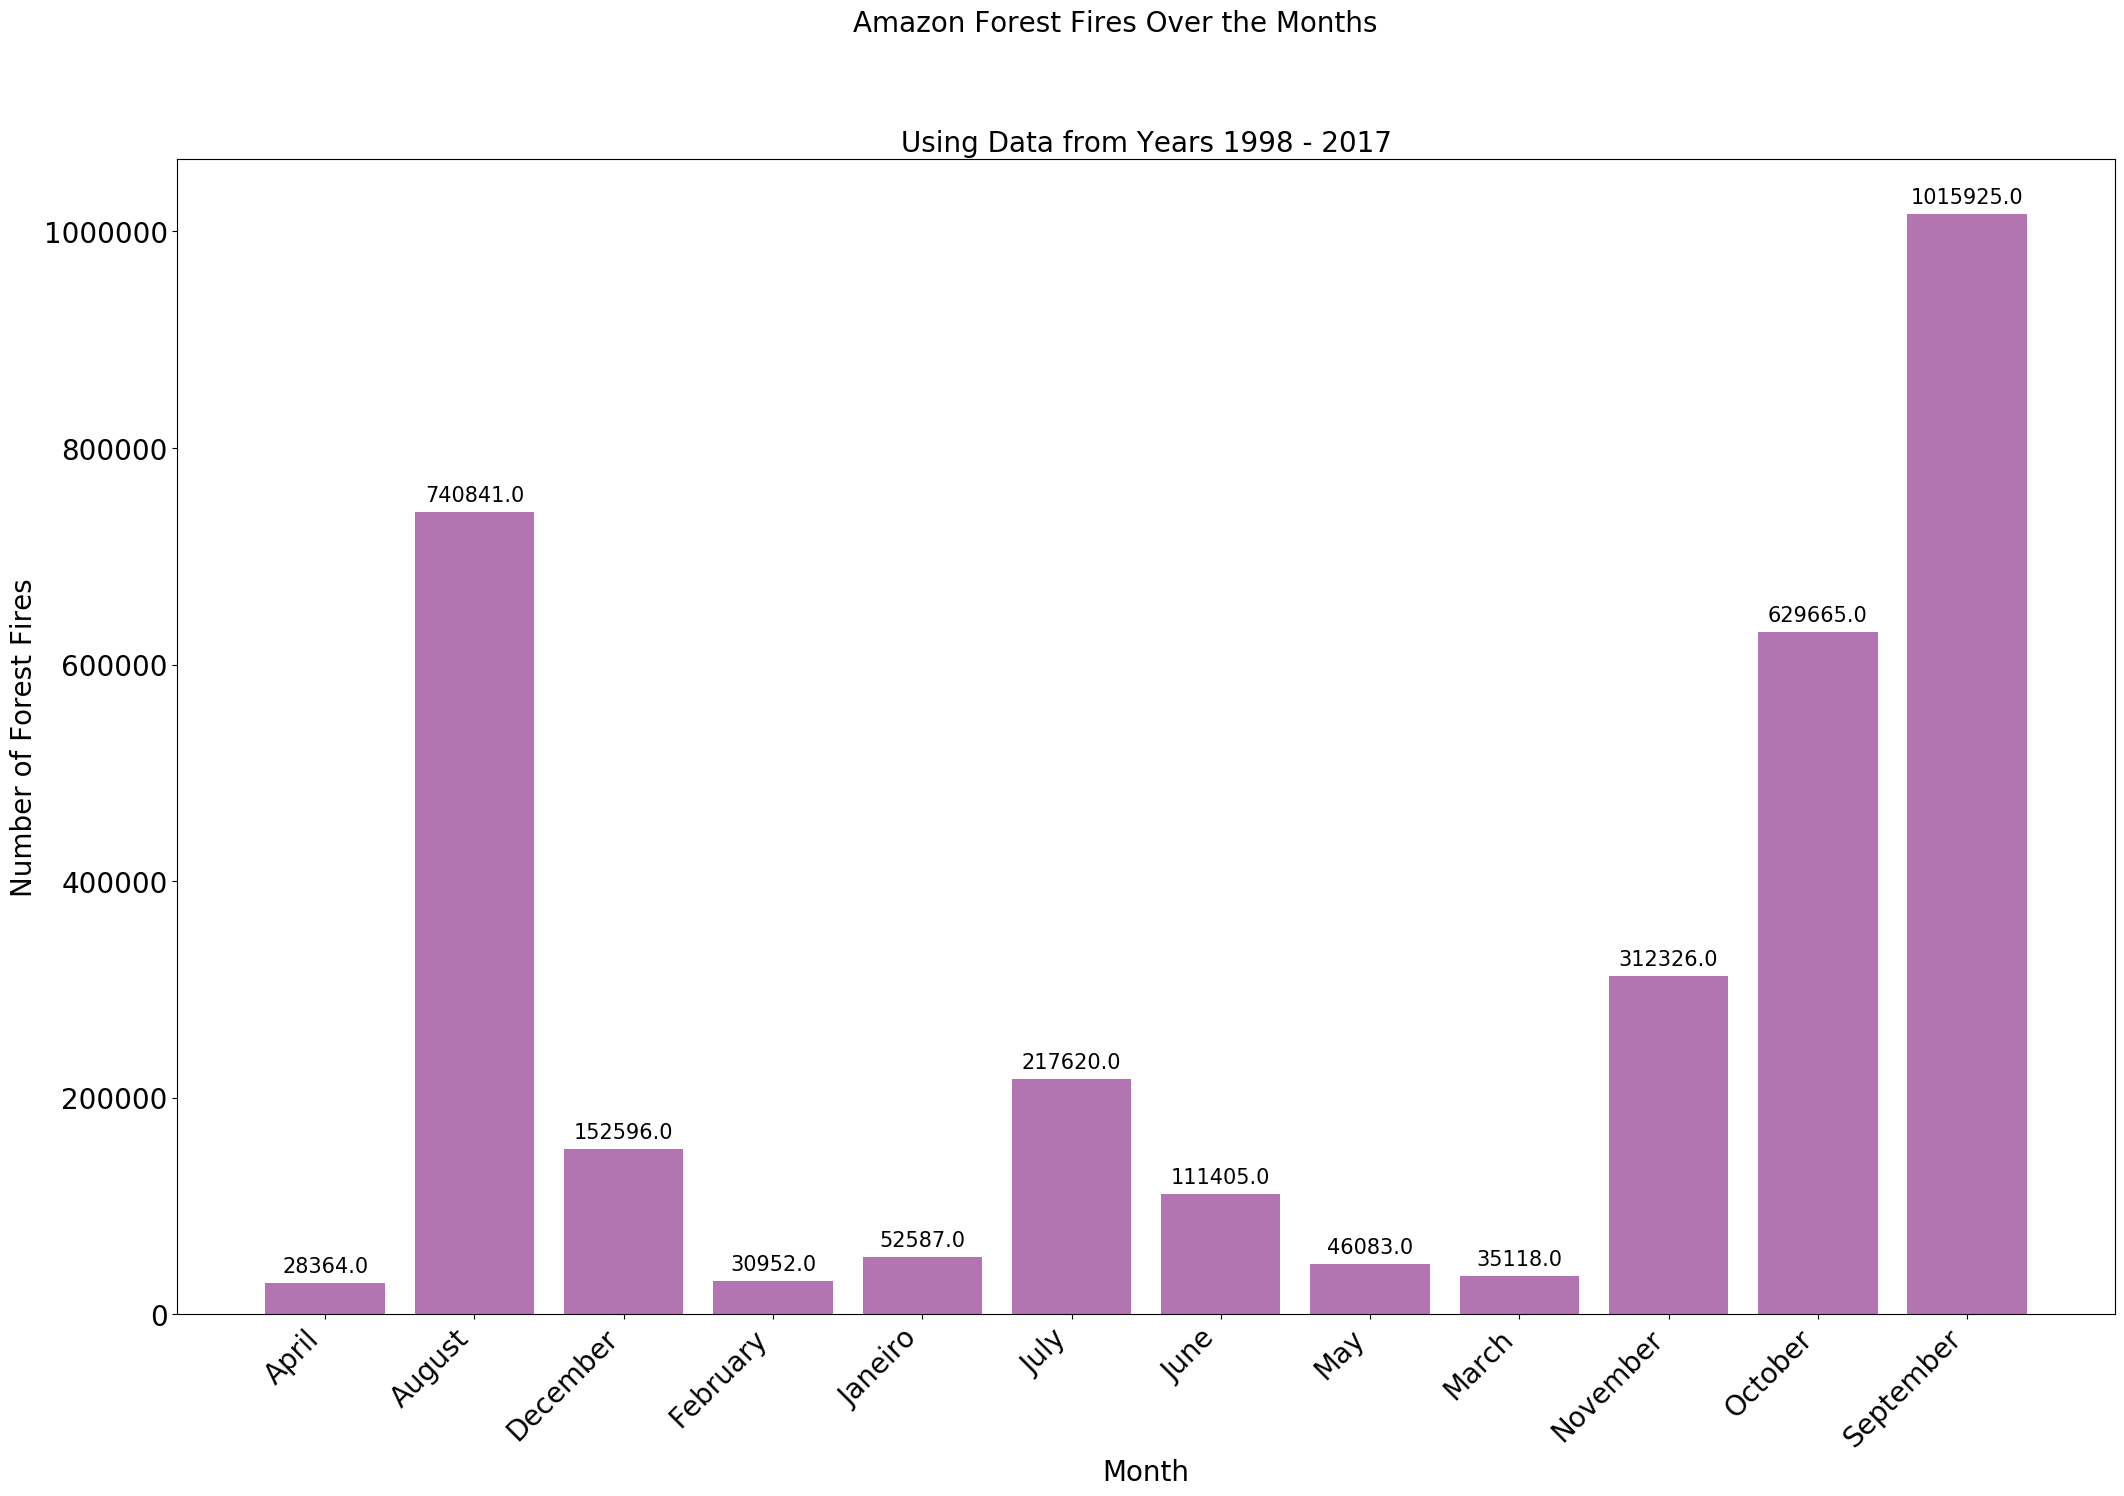

In [40]:
plt.figure(figsize=(25, 15)) #specify width and height 
#plt.bar(x-values, y-values) 
plt.bar(
forest_fire_per_month['month'],
forest_fire_per_month['number'], 
color = (0.5,0.1,0.5,0.6)) 
plt.suptitle('Amazon Forest Fires Over the Months', fontsize=20)
plt.title('Using Data from Years 1998 - 2017', fontsize=20)
plt.xlabel('Month', fontsize=20) 
plt.ylabel('Number of Forest Fires', fontsize=20)
for i, num in enumerate(forest_fire_per_month['number']):
    plt.text(i,num + 10000,num,ha='center',fontsize=15)   
    plt.setp(plt.gca().get_xticklabels(),rotation=45,horizontalalignment='right',fontsize=20)
    plt.setp(plt.gca().get_yticklabels(), fontsize=20)